# Single perceptron implementation

<IPython.core.display.Javascript object>


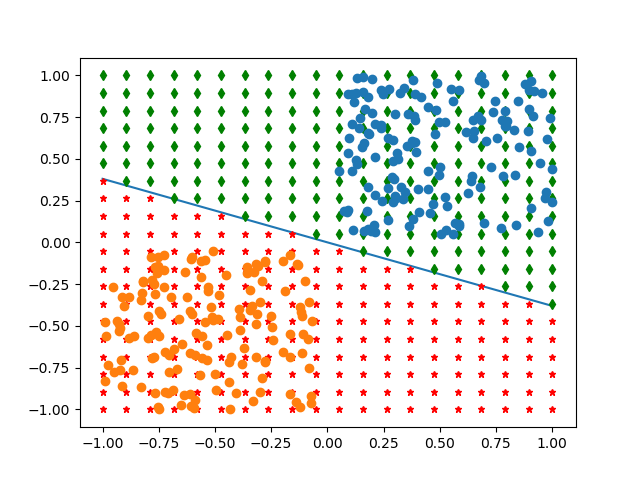

In [4]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

class Pattern(object):
	def __init__(self, x1, x2, d):
		self.x1 = x1
		self.x2 = x2
		self.d = d

	def __str__(self):
		return "{},{},{}".format(self.x1, self.x2, self.d)


def build_sample_patterns(amount_patterns):
	class_1_x1_i = 0.05
	class_1_x1_f = 1.0
	class_1_x2_i = 0.05
	class_1_x2_f = 1.0
	patterns_class_1 = []

	class_2_x1_i = -0.05
	class_2_x1_f = -1.0
	class_2_x2_i = -0.05
	class_2_x2_f = -1.0
	patterns_class_2 = []

	x1_1 = np.array(np.random.uniform(low=class_1_x1_i, high=class_1_x1_f, size=amount_patterns))
	x2_1 = np.array(np.random.uniform(low=class_1_x2_i, high=class_1_x2_f, size=amount_patterns))
	d_1 = np.array([1 for x in range(0,amount_patterns)])
	

	x1_2 = np.random.uniform(low=class_2_x1_i, high=class_2_x1_f, size=amount_patterns)
	x2_2 = np.random.uniform(low=class_2_x2_i, high=class_2_x2_f, size=amount_patterns)
	d_2 = np.array([-1 for x in range(0,amount_patterns)])
	
	for i in range(0, amount_patterns):
		c1_pattern = Pattern(x1_1[i], x2_1[i], d_1[i])
		patterns_class_1.append(c1_pattern)
		c2_pattern = Pattern(x1_2[i], x2_2[i], d_2[i])
		patterns_class_2.append(c2_pattern)
		
	return patterns_class_1, patterns_class_2


def adjust_weight(w, eta, x, d):
	mult = w.dot(x)
	sign = 1 if mult >= 0 else -1
	new_w = eta * ((d - sign) * x)

	return new_w


def calculate_x2(w1, w2, x, b):
	# because w1*x1 + w2*x2 + w0
	return (-b - (w1*x)) / w2
	# or equivalent
	# return - (w1/w2)*x - (b/w2)


def classify_and_plot(w, x_sample):
	sign = w.dot(x_sample)
	marker = 'd' if sign>=0 else '*'
	color = 'red' if sign<0 else 'green'
	plt.plot([x_sample[1]], [x_sample[2]], marker, markersize=5, color=color, zorder=2)


def classify_samples(w):
	top=20
	x1s = np.linspace(-1,1,top)
	x2s = np.linspace(-1,1,top)
	
	for x1 in x1s:
		for x2 in x2s:
			classify_and_plot(w, [1,x1,x2])


def plot_patterns(patterns_class_1, patterns_class_2):
	plt.scatter([x.x1 for x in patterns_class_1], [x.x2 for x in patterns_class_1], zorder=9999)
	plt.scatter([x.x1 for x in patterns_class_2], [x.x2 for x in patterns_class_2], zorder=9999)


def calculate_and_plot_hyperplane(w):
	b = w[0]
	x1_i = -1
	x1_f = 1
	x2_i = calculate_x2(w[1], w[2], x1_i, b)
	x2_f = calculate_x2(w[1], w[2], x1_f, b)
	plt.plot([x1_i, x1_f],[x2_i, x2_f], zorder=1)


if __name__ == '__main__':
	eta = 0.95
	amount_patterns = 150
	dimensions = 2
	patterns_class_1, patterns_class_2 = build_sample_patterns(amount_patterns)
	
	patterns = [item for sublist in zip(patterns_class_1,patterns_class_2) for item in sublist] # mixes lists
	w = np.zeros(dimensions + 1)

	for x in patterns:
		w = w + adjust_weight(w, eta, np.array([1, x.x1, x.x2]), x.d)

	plot_patterns(patterns_class_1, patterns_class_2)
	calculate_and_plot_hyperplane(w)
	classify_samples(w)
	plt.show()
	